In [7]:
using Pkg 
Pkg.add("FFTW")
using FFTW
using Plots
Pkg.add("Printf")
using Printf

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
    405.7 ms  ? ComplexDiff
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
    224.0 ms  ? ComplexDiff


In [8]:
# Suma en Julia
sum(cos(i) for i in 1:100)

-0.5322886082303911

In [9]:
function derivada(f,x)                  #Definimos una función usando la paquetería ForwardDiff para derivar.
    ForwardDiff.derivative(f,x)
end
x1 = -5.0:0.01:5
A = 5^2
N_Eigenvalores = 10
X = zeros(N_Eigenvalores)
Y = zeros(2*N_Eigenvalores);
length(Y)

20

In [10]:
c = 0.01
function difprog(f1,x_k)
    x_k1 = x_k +c
    h = x_k1-x_k 
    return (f1(x_k1)-f1(x_k))/h
end

difprog (generic function with 1 method)

In [14]:
j = 100
xlm = 1:1:j
f2(x) = x^2 + 4
function guess(f2,h5)
    X4 = zeros(j)
    x = 1.3 + h5
    for i in 1:j
        xn = x - f2(x)/difprog(f2,x)
        x = xn
        X4[i] = xn 
    end
    return X4
end

guess (generic function with 1 method)

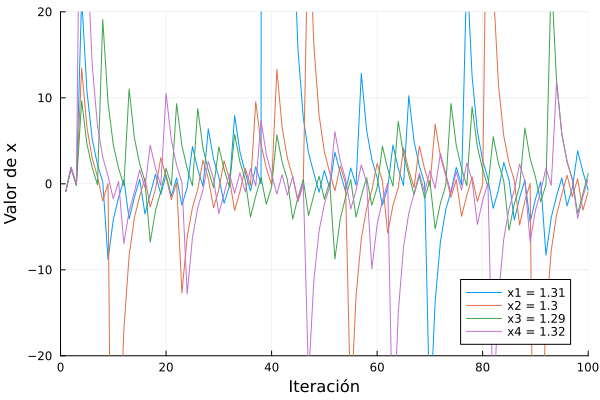

In [21]:
plot(xlm,guess(f2,0.01),xlabel = "Iteración",ylabel = "Valor de x",label = "x1 = 1.31", xlims = (0,100), ylims= (-20,20))
plot!(xlm,guess(f2,0), label = "x2 = 1.3")
plot!(xlm,guess(f2,-0.01), label = "x3 = 1.29" )
plot!(xlm,guess(f2,0.02), label = "x4 = 1.32")

In [86]:
gprime(x) = (x^2 + 4)/(2x^2)

gprime (generic function with 1 method)

In [87]:
n10 = j
lambda = 1/n10 * sum(log(abs((gprime(guess(f2,0.01)[i])))) for i in 1:n10)

0.6913414416421055

In [88]:
lambda1 = 1/n10 * sum(log(abs(gprime((guess(f2,0)[i])))) for i in 1:n10)

0.6976559019436214

In [89]:
lambda2 = 1/n10 * sum(log(abs(gprime((guess(f2,-0.01)[i])))) for i in 1:n10-1)

0.6925974978560289

In [90]:
log(2)

0.6931471805599453

In [91]:
A1 = fft(guess(f2,0.01));

In [92]:
A1cuad = abs.(A1).^2;

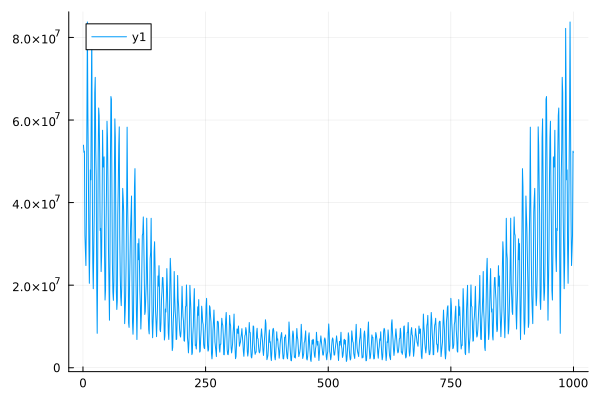

In [93]:
plot(xlm,A1cuad)

In [193]:
f(x) = x^4 + 4
n = 200 #IteracionesMax
tol = 0.00001 #Tolerancia
g(x) = 4x^3 # Derivada de la función

function find(f,x)
    k=0
    F = f(x) # Función evaluada en el First Guess
    if F == 0 
        print("La raíz es $x")
    else 
        while tol < abs(F) && k < n
            xi = x - f(x)/g(x)
            x = xi
            F = f(x)
            k = k+1
        end
        if abs(F) > tol
            print("No se pudo encontrar la raíz en $n iteraciones")
        else
            print("La raíz es $x, raíz encontrada en $k iteraciones")
        end
    end 
    return x
end

find (generic function with 1 method)

In [192]:
find(f,0.5+1.3im)

La raíz es 1.000000000006653 + 0.9999999999961595im, raíz encontrada en 6 iteraciones

1.000000000006653 + 0.9999999999961595im